<a href="https://colab.research.google.com/github/saurabbh14/python_tutorial_winter_semister_2021-22/blob/main/Py_tut_winter_sem_2021_22__3_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Extraction and Visualization




## Recap & homework discussion

Let's go over the things you learnt so far.

Here is a (not anymore so) short list of all the concepts you got to know already:

- Math operations in Python (`+, -, *, /, //, %`)
- Basic data types in Python (`bool`, `float`, `int`, `str`)
- Calling functions (`print()`, `help()`)
- Lists (`[1, 2, 3, 4]`)
- Control flow : If-else statements (asking questions, making decisions)
- Loops (`for` and `while`)
- Defining functions
- Modules (`numpy`, `matplotlib.pyplot`, local modules)
- Velocity Verlet Algorithm(Molecular dynamics simulations) 


Did you encounter any problems, syntax errors or other issues in your home-based Python journey? 




In [ ]:
# Did you encounter any problems/bugs/errors?


## Introducing I/O

Until now, all we did was crush numbers internally. Most of you will work with some software packages to calculate data or run experimenta where you will encounter large amounts of calculated or measured data that you may want to process using Python. 

This is where I/O comes in, which is short of input/output. This is the large topic of reading data from a file (**input**), processing the data in it and writing new information to a file (**output**).

Our first goal will be to read strings, lists and arrays from files. To write a file in Colab (one that we can read), go to the "Files"-Tab on the right-hand side and on right click, you can upload a file from your computer.




### Direct user input

If you want to ask the user of your program a question, you can use the `input()` function. In the parantheses put the question that you want to ask as a string. The return value (that you typically assign to a variable) is always a `str`ing.

See an example here:

In [ ]:
# Test ground
name = input("What's your name? ")
print("Hello, " + name + "!")


You find more exercise on user input using the `input()` function in the last homework notebook. As the function really is neither particularly interesting nor (in the grand scheme of things) exceptionally useful, let's continue with files!

### Reading and writing files

#### Reading files

In the first part of this notebook, we'll use the sample files provided in Colab. Let's try to open and read a file (/content/sample_data/california_housing_test.csv) using Python. There are several ways one can read a file in Python. We'll see two most common ones.

The first one and more common one is to use `with open(...) as ... :` statement:

In [ ]:
# Open the file. The string is the `path` to the file.
with open("/content/sample_data/california_housing_test.csv", "r") as f:  #`f` is assigned automatically.
  headerl = f.readline()    # reads the first line
  filebody = f.readlines()  # reads the rest of the lines

# Now you can do things with the file, for example, print it:

print(headerl)
print(filebody)




Remember that all these lines are still of the type `string`. That means that we *cannot* yet use our matrix or vector functions on it. We need to process that data beforehand.

Another way is to use NumPy. While this may be necessary for more specialised data formats, NumPy allows for easy reading and writing of standard n-column `.txt`,`.csv` files. And the output, we'll get after reading is always as an array. For more information you may refer to https://numpy.org/devdocs/user/how-to-io.html

In [ ]:
# we can read the file with numpy:
import numpy as np

read_data = np.genfromtxt("/content/sample_data/california_housing_test.csv", 
                            delimiter=",", dtype=np.float, skip_header=1)
# Notice: if your script line is getting too long, there are ways wrap it around (as done above).

print(read_data)

 


#### Processing the data and String Manipulation

Now that we have the raw data, we can use it to generate our matrix of numbers.
To do so, we need to process the strings that we got from the file reading.

Three very helpful string functions are the string methods `.strip()`, `.split()` and `.join()`. Methods are functions that can be applied directly to a data type, like here:  

In [ ]:
test_str = "   My grandma rides, her motor-cycle in the, chicken ,coop.\n"
print("Given String:", test_str)

# The split() method splits strings. By default, it splits the string 
# at whitespaces (including newline characters).
splitted_ws = test_str.split()
print("Splitted String:", splitted_ws, "\n")

# You can also supply the method with a character to split at.
splitted_ds = test_str.split(",")
print("String splitted with ',':", splitted_ds, "\n")

# The strip() methods trims whitespaces and newline characters ("\n") around a string.
stripped = test_str.strip()
print("String Stripped off all extra spaces:",stripped, "\n")

# The join() method joins a list of strings using a delimiter string.
joined = "+".join(splitted_ds)
print("String Joinrd with '+':", joined)

# You can also chain these operations (they are applied from left to right).
strip_splitted = test_str.strip().split("-")
print(strip_splitted)



Okay then, we now know how to read files and how to process the obtained strings. Let's perform a simple task.

**Task:** Take the list of strings(content of the file) which were read from the file `/content/sample_data/california_housing_test.csv` and covert the string elements into floats(or integers). (**Notice** that we do not need to perform this process for the file-reading using Numpy.)

In [ ]:
# Let's brain storm :)
filebody_list=[]
for line in filebody:
  line_list=[]
  for item in line.strip().split(","): # splitting and striping
    line_list.append(float(item))  # changing string to float and adding it to a list
  filebody_list.append(line_list)  # creating a list of lists(or a matrix)

print(filebody_list)



#### Writing files

Now that we have read the file, we may now want to store the data back in another file. To do so, we need a function that can actually process that data back into strings and then write it back to a file.

Using the `open()` function, you can also open files that are not yet created. Using the parameter `"w"` instead of `"r"` you tell Python to open the file writeable. You can also simply `str`ingify a numerical value using the `str` function.

With the file handle (what we called `f`) comes a `.write(...)` as well as a `.writelines(...)` method that allows you to write a string or a list of strings (joined by newline characters) to the file represented by the handle.

Let's build a function which takes the path of the file and lists of strings you want to write into the file.

In [ ]:
def write_file(file_path,header,data):
    list_str=[]
    for row in data:
      item_str=[]
      for item in row:
        item_str.append(str(item))
      list_str.append(",".join(item_str)+"\n")
    
    with open(file_path, "w") as f: 
     f.write(header)
     f.writelines(list_str)


write_file("/content/sample_data/california_housing_test_1.csv",headerl, filebody_list)


# Scientific Applications

Last time around you went through the quantum chemistry part of the tutorials where you did some excited state calculations for Benzene in gas as well as in liquid phase. These calculations provide us with energy states(here electronic energy states) of the molecule and subsequently the UV-vis spectra which shows transitions among these states. You probably have already visualized these spectra during last tutorial (or at home) using Gaussview. Now we will see how can we obtain same spectra using python.

First thing we are gonna need is the Gaussian `.log` file of excited states calculations. Please upload your `.log` file on the colab platform (You can do it using the folder icon on the left)... Done?... Good!!

Now, Our first order of business is to extract the "Particular" Data from the file. How can we do that? Before going forward, let's think what Data do we need? You must have noticed the `.log` file contains various kinds of data and we are interested in particular datalines.
How can we locate the those lines while reading the file using python?
Let's think for a moment.(**Hint: `if (...):`**)

Notice that in this particular case the lines in question read:

` Frequencies --   1622.0622              3804.1183              3938.4185`

` Red. masses --      1.0824                 1.0455                 1.0812`

` Frc consts  --      1.6778                 8.9139                 9.8814`

` IR Inten    --     67.4786                 4.1448                67.0645`

` Raman Activ --      1.9540               104.0721                24.1657`

` Depolar (P) --      0.6329                 0.0416                 0.7500`

` Depolar (U) --      0.7752                 0.0799                 0.8571`

and we need energy/frequency of the transition and IR/Raman intensities of the transition(signal strengths) from these line.

**Note:** You can have various data files (`.log`,`.csv`,`.dat`etc.) depending on the sofware you have used. So while extracting the data, one should be aware of the format of the data-file. There are many python libraries(ex. `pandas`) which are designed to deal with data extraction from specific kinds of data files, but those are beyond the scope of this course.

In [ ]:
with open("/content/H2O_MP2_aug-cc-pvdz.log", "r") as f:  # reading in the file as a list whose elements
    text = f.readlines()                    # are separate lines of the file 
    
# forming lists 
for line in text:
    if (line.find("Frequencies --") != -1):  # True if line contains Frequencies --
        print(line)
        freq_list=line.split()[2:]
    elif (line.find("IR Inten    --") != -1):
        print(line)
        IR_inten_list=line.split()[3:]
    elif (line.find("Raman Activ --") != -1):
        print(line)
        Raman_scat_list=line.split()[3:]
        
print(freq_list)
print(IR_inten_list)
print(Raman_scat_list)



Nice! Now let's process and visualize the extracted data.

[1622.0622, 3804.1183, 3938.4185]
[67.4786, 4.1448, 67.0645]
[1.954, 104.0721, 24.1657]


<StemContainer object of 3 artists>

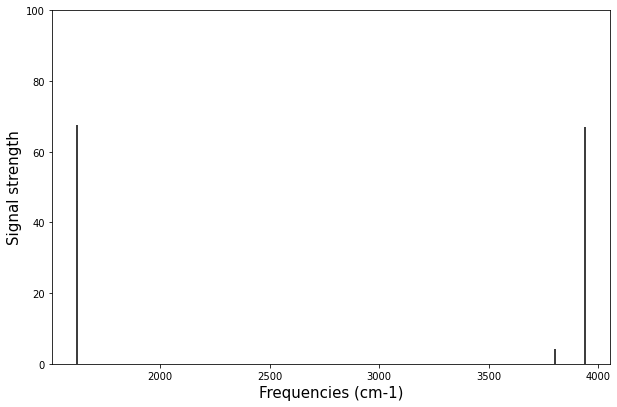

In [ ]:
import matplotlib.pyplot as plt

#get rid of "string" part and converting it to float
freq = []
IR_inten = []
Raman_scat = [] 
for item in freq_list:
    freq.append(float(item))

for item in IR_inten_list:
  IR_inten.append(float(item))

for item in Raman_scat_list:
  Raman_scat.append(float(item))
#    
print(freq)
print(IR_inten)
print(Raman_scat)


# Generating stick spectra
plt.figure(figsize=(10.0, 6.5))
plt.xlabel("Frequencies (cm-1)", fontsize=15)
plt.ylabel("Signal strength", fontsize=15)
#plt.grid()
plt.ylim(0.0,100)
#plt.gca().invert_yaxis()
plt.stem(freq, IR_inten, markerfmt=" ", linefmt='k-', basefmt=" ", use_line_collection=True)



Well, now we successfully obtained the spectra. But as you know the real experimental IR spectra has broad peaks due many broadening phenomenons. Here we will try to immitate this broadening by placing Lorentzian functions at the peak positions and replotting the spectra.

But first, a small task! Let's define the gaussian function.
$$L(x)=\frac{A}{1+s^2}$$
where $A$ is the amplitude (signal strength) and $s$ is given as follows,
$$s=\frac{x-x_0}{ω/2} $$
here $x$ is the position at which the function is evaluated. $x_0$ is the function center(peak position) and $ω$ is the full width half maxima(FWHM).
First, let's see how it looks.

**Task:** Define the Lorentzian function. And plot it to understand how it looks. For understanding purpose, you may use $A=1$, $x_0=0$ and $ω=1$. Remember to take these parameters as arguments. Do not define them as global variables.

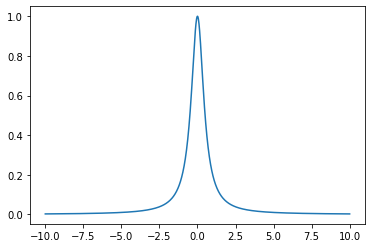

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# defining a Lorentzian with corresponding parameters 
def Lorentzian(x, A, x_0, fwhm):
    s=(x-x_0)/(0.5*fwhm)
    return A/(1+s**2)

x_val = np.linspace(-10.0,10.0,1001)

y_val = Lorentzian(x_val,1,0,1)

plt.plot(x_val, y_val)


Let's add the Lorentzian function to the IR spectra and visualize.

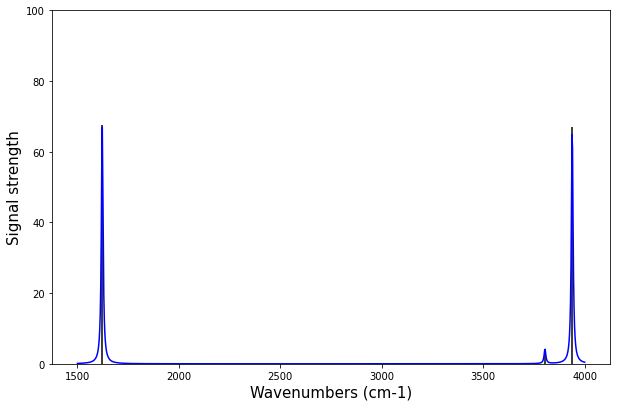

In [ ]:
#now we use numpy arrays
f = np.array(freq)
IR = np.array(IR_inten)

#print(f)
#print(lmbda)
#print()

x_val = np.linspace(1500.0, 4000.0, 1001)
# Store Lorentzian functions and add them up to get one homogeneous plot
spectra_broad=np.zeros(1001)
for i, val in enumerate(f):
    spectra_broad +=Lorentzian(x_val,IR[i],val,10.0)

plt.figure(figsize=(10.0, 6.5))
plt.xlabel("Wavenumbers (cm-1)", fontsize=15)
plt.ylabel("Signal strength", fontsize=15)
#plt.grid()
plt.ylim(0.0, 100)
plt.stem(f, IR, markerfmt=" ", linefmt='k-', basefmt=" ", use_line_collection=True) 
plt.plot(x_val, spectra_broad, "b")
plt.savefig("fig.png")
plt.show()

**Task:** Obtain the Raman spectra with bradening. (**Hint:** you just have to replace one array in the above code)

In [ ]:
# Your code goes here. Good luck!!

**Task/Homework:** Obtain the similar IR and Raman spectras for the water molecule, as discussed above, from the Gaussian log files which you have  calculated in tutorial #10(Properties of the wavefunction) in the computational chemistry part of these tutorials. There you used different levels of theory to calculate these spectras namely, HF, MP2 with basis functions cc-pVDZ, aug-cc-pVDZ. So you have 4 different calculations(`.log` files) of IR and Raman spectras for the water molecule. Visualize the spectras and compare different level of theories.

In [ ]:
#You can use this code space or open new code block. Remember to upload your log files to the notebook